<a href="https://colab.research.google.com/github/CamiloDiazBPR/ProyectoParteIII-Diaz/blob/main/ProyectoParteIII%2BDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import pandas as pd


df_wine = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/WineQT.csv')

print("DataFrame cargado exitosamente. Primeras 5 filas:")
display(df_wine.head())

DataFrame cargado exitosamente. Primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#¿Cuáles son las variables químicas que tienen la mayor correlación (positiva o negativa) con la calidad del vino?

In [4]:
# Calcular la matriz de correlación completa
correlation_matrix = df_wine.corr()

# Mostrar las correlaciones de todas las variables respecto a 'quality'
print("\n--- Correlación de las Variables con la Calidad (quality) ---")
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
display(quality_correlations)

# Identificar las top 3 variables más correlacionadas
# Valor absoluto para incluir correlaciones negativas fuertes
top_correlated_features = quality_correlations.drop(['quality', 'Id']).abs().sort_values(ascending=False).index[:3]
print(f"\nTop 3 variables con mayor impacto (correlación): {list(top_correlated_features)}")




--- Correlación de las Variables con la Calidad (quality) ---


,quality
quality,1.000000
alcohol,0.484866
sulphates,0.257710
citric acid,0.240821
fixed acidity,0.121970
Id,0.069708
residual sugar,0.022002
pH,-0.052453
free sulfur dioxide,-0.063260
chlorides,-0.124085



Top 3 variables con mayor impacto (correlación): ['alcohol', 'volatile acidity', 'sulphates']


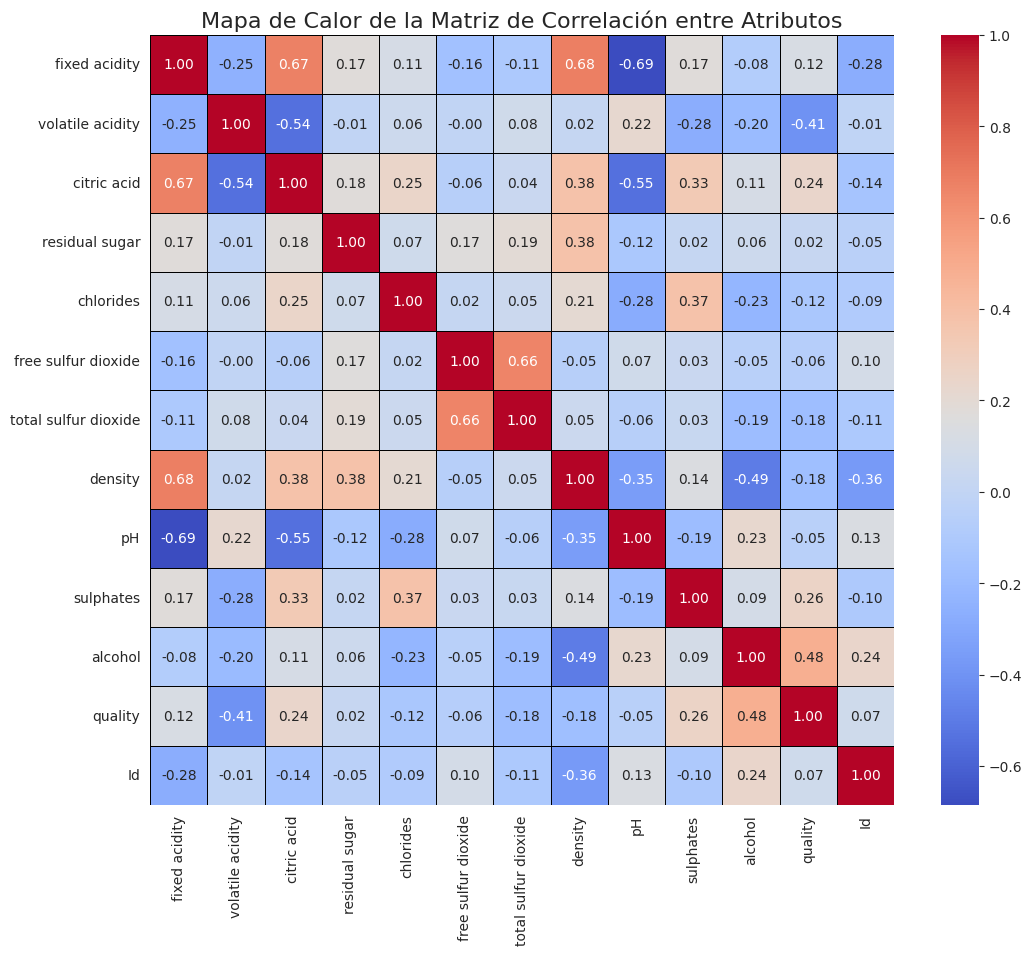

In [5]:
# Visualización de la Correlación (Multivariado)

plt.figure(figsize=(12, 10))
# Mapa de calor para visualizar la matriz de correlación completa
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black')
plt.title('Mapa de Calor de la Matriz de Correlación entre Atributos', fontsize=16)
plt.show()


--- Distribución Univariada de la Calidad (quality) ---


/tmp/ipython-input-1347917495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_wine, palette='viridis')


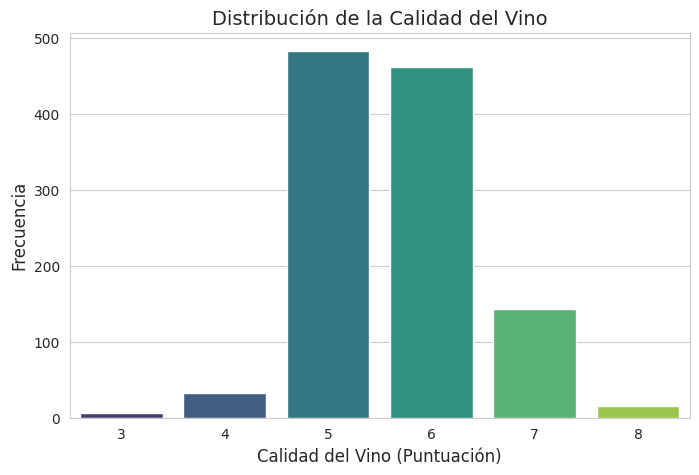

In [6]:
# Análisis Univariado de la Calidad (quality)

print("\n--- Distribución Univariada de la Calidad (quality) ---")
# La calidad es una variable ordinal (categórica)
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_wine, palette='viridis')
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xlabel('Calidad del Vino (Puntuación)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


--- Visualización Bivariada: Top Correlacionadas vs. Calidad ---


/tmp/ipython-input-704669287.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_wine, palette='mako')


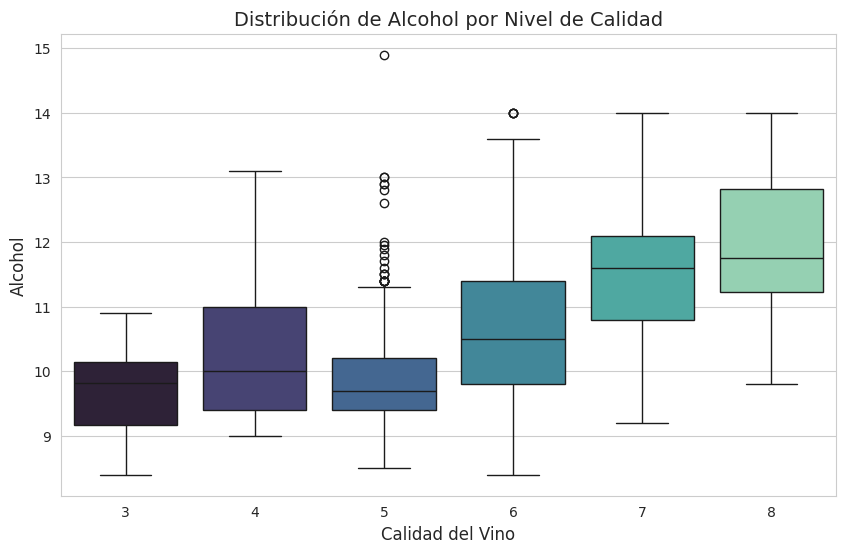

/tmp/ipython-input-704669287.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_wine, palette='mako')


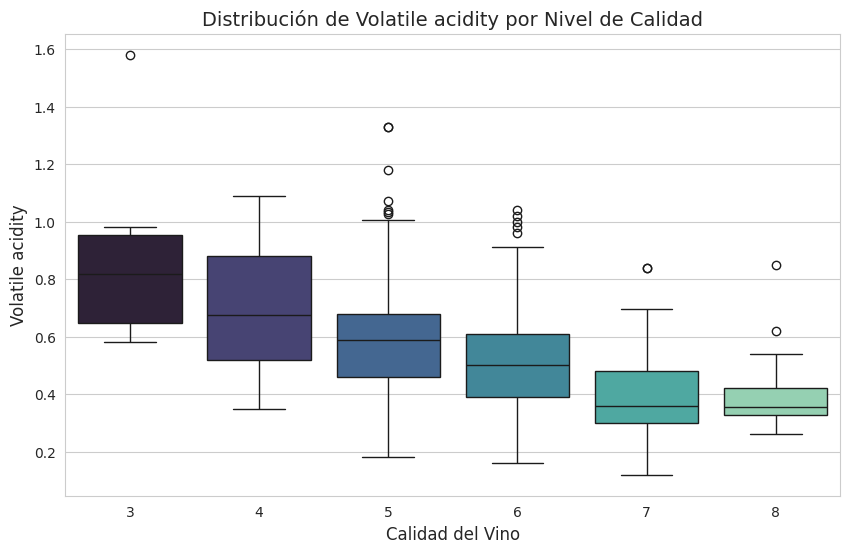

/tmp/ipython-input-704669287.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_wine, palette='mako')


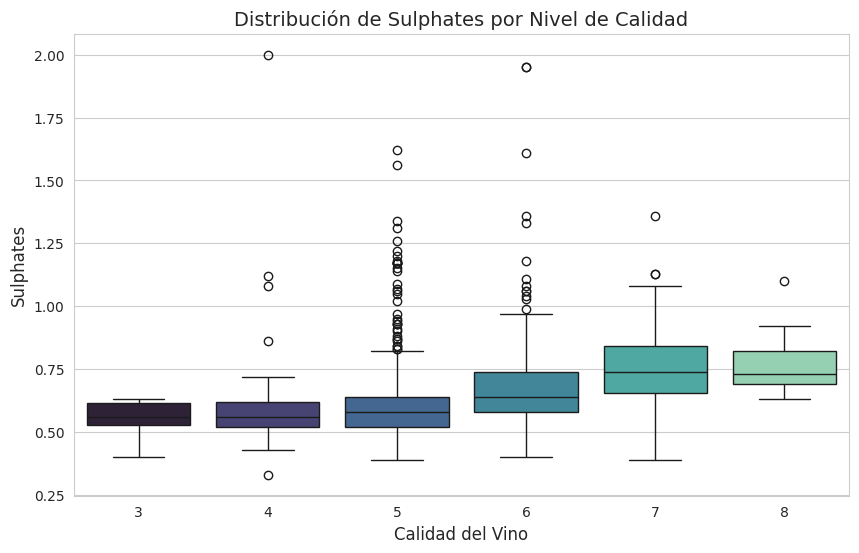

In [7]:
# Visualizaciones Bivariadas (Top Correlacionadas vs. Quality)

print("\n--- Visualización Bivariada: Top Correlacionadas vs. Calidad ---")

# Iterar sobre las top 3 variables encontradas para generar scatter plots (o box plots)
for feature in top_correlated_features:
    plt.figure(figsize=(10, 6))

    # Box Plot para visualizar cómo se distribuye la característica en cada nivel de calidad.
    sns.boxplot(x='quality', y=feature, data=df_wine, palette='mako')

    plt.title(f'Distribución de {feature.capitalize()} por Nivel de Calidad', fontsize=14)
    plt.xlabel('Calidad del Vino', fontsize=12)
    plt.ylabel(feature.capitalize(), fontsize=12)
    plt.show()

In [ ]:
# El objetivo de esta sección fue identificar los atributos químicos más influyentes en la determinación de la calidad del vino (quality),
# medida en una escala de 3 a 8. Para ello, se empleó un análisis de correlación de Pearson y visualizaciones bivariadas.


# El cálculo de la correlación de Pearson (r)
#reveló que la calidad del vino es impactada de manera significativa tanto por factores que la impulsan positivamente como por aquellos que actúan como penalizaciones.
# Las variables con una correlación positiva más fuerte con la calidad son: Alcohol, Sulphates, Citric Acid
# Las variables con una correlación negativa más fuerte con la calidad son: volatile acidity, chlorides, total sulfur dioxide



# Las visualizaciones bivariadas (Box Plots) confirman las conclusiones de la correlación, especialmente para las dos variables más influyentes:
# alcohol vs. quality: Los Box Plots muestran una clara tendencia ascendente en la mediana del contenido de alcohol a medida que la calidad aumenta de 5 a 8.
# Esto valida que los vinos de mayor calidad (quality >7) se distinguen por tener un porcentaje de alcohol notablemente más alto que los vinos de calidad media o baja.

#volatile acidity vs. quality: Se observa una tendencia descendente y significativa.
#Los vinos con una calidad baja (quality <4) presentan una mediana de acidez volátil mucho más alta y un rango más disperso,
# mientras que los vinos de calidad alta (quality >7) muestran una concentración de acidez volátil marcadamente menor y más estable.

--- MODELO 1: TODAS LAS VARIABLES ---
Accuracy: 0.6812

Reporte de Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



--- MODELO 2: FEATURE SELECTION (REDUCIDO) ---
Accuracy: 0.6681

Reporte de Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.75      0.72        96
           6       0.64      0.63      0.63        99
           7       0.70      0.73      0.72        26
           8       0.00      0.00      0.00         2

    accu

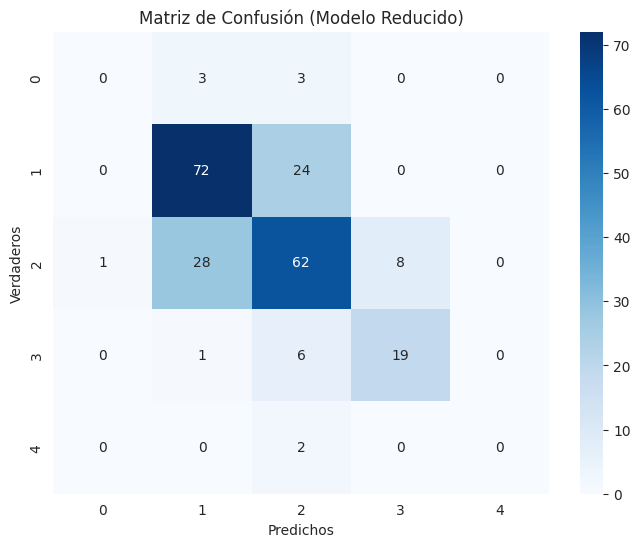

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 1) FEATURE SELECTION
# Basado en el heatmap, las variables con mayor correlación con 'quality' suelen ser:
# Alcohol, Volatile Acidity, Sulphates and Citric Acid.
features_seleccionadas = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

# Definimos dos sets de X para comparar:
X_full = df_wine.drop('quality', axis=1) # Todas las columnas
X_sel = df_wine[features_seleccionadas]  # Solo las seleccionadas
y = df_wine['quality']

# Separamos en Train y Test (80% / 20%)
X_train_f, X_test_f, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_s, X_test_s, _, _ = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# 2) ALGORITMO DE CLASIFICACIÓN
# Se elige Random Forest pues maneja bien las relaciones no lineales
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sel = RandomForestClassifier(n_estimators=100, random_state=42)

# Se entrenan ambos modelos
rf_full.fit(X_train_f, y_train)
rf_sel.fit(X_train_s, y_train)

# 3) CÁLCULO DE MÉTRICAS
pred_full = rf_full.predict(X_test_f)
pred_sel = rf_sel.predict(X_test_s)

print("--- MODELO 1: TODAS LAS VARIABLES ---")
print(f"Accuracy: {accuracy_score(y_test, pred_full):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, pred_full, zero_division=0))

print("\n" + "="*50 + "\n")

print("--- MODELO 2: FEATURE SELECTION (REDUCIDO) ---")
print(f"Accuracy: {accuracy_score(y_test, pred_sel):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, pred_sel, zero_division=0))

# Matriz de confusión visual para el modelo seleccionado
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred_sel), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Modelo Reducido)')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')
plt.show()

In [ ]:
##) Conclusiones Generales del Modelo

#Tras entrenar y evaluar el modelo de Random Forest para la clasificación de la calidad del vino, se han obtenido los siguientes hallazgos:

#1. Impacto de la Selección de Características (Dimensionalidad):
#El Modelo 1 (Todas las variables) obtuvo un Accuracy de 68.12%.
#El Modelo 2 (Variables Seleccionadas) obtuvo un Accuracy de 66.81%.

#Conclusión: La reducción de dimensionalidad fue exitosa. Al utilizar solo las 4 variables más correlacionadas (alcohol, acidez volátil, sulfatos y ácido cítrico), el rendimiento del modelo apenas disminuyó un 1.3%.
#Esto indica que la mayor parte de la información predictiva reside en estos atributos químicos, permitiéndonos tener un modelo más simple y eficiente computacionalmente sin sacrificar precisión significativa.

#2. Desempeño por Clases (El problema del desbalance): Al analizar el Classification Report, observamos un comportamiento desigual:

#Clases Mayoritarias (Calidad 5 y 6): El modelo tiene un desempeño sólido, con F1-Scores de 0.74 y 0.66 respectivamente. Esto es lógico ya que estas clases representan la gran mayoría de los datos de entrenamiento.
#Clases Minoritarias (Calidad 4 y 8): El modelo falló completamente al identificar estas clases (Precision y Recall de 0.00).
#Interpretación: El modelo tiene un sesgo hacia los vinos de calidad "promedio". Si el objetivo del negocio es detectar vinos "excepcionales" (calidad 8) o "defectuosos" (calidad 3-4), el modelo actual no es suficiente.

#3. Conclusión final: El modelo es bueno para catalogar vinos estándar, logrando predecir correctamente la calidad en casi 7 de cada 10 casos.
#Sin embargo, para mejorar la detección de vinos de gama alta o baja, sería necesario aplicar técnicas de balanceo de datos (como SMOTE o penalización de clases) en una futura iteración.